# Definicao do Problema

Vamos estudar os precos das casas em Melborn

# Coleta dos dados

Obtemos esses dados no Kaggle

# Importando Pacotes

In [16]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

%matplotlib inline

Remove warnings

In [17]:
import warnings
warnings.filterwarnings('ignore')

# Carrega Base de dados

In [18]:
cols_to_use = ['Rooms','Price','Method','Date','Distance','Propertycount','Bedroom2',
                'Bathroom','Car','Landsize','BuildingArea','YearBuilt','Lattitude',
                'Longtitude']
base = pd.read_csv("./data/melb_data.csv", usecols=cols_to_use)
print(base.shape)
base.head()

(13580, 14)


,Rooms,Price,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1480000.0,S,3/12/2016,2.5,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0
1,2,1035000.0,S,4/02/2016,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
2,3,1465000.0,SP,4/03/2017,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0
3,3,850000.0,PI,4/03/2017,2.5,3.0,2.0,1.0,94.0,NaN,NaN,-37.7969,144.9969,4019.0
4,4,1600000.0,VB,4/06/2016,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0


# Limpeza de dados

In [19]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          13580 non-null  int64  
 1   Price          13580 non-null  float64
 2   Method         13580 non-null  object 
 3   Date           13580 non-null  object 
 4   Distance       13580 non-null  float64
 5   Bedroom2       13580 non-null  float64
 6   Bathroom       13580 non-null  float64
 7   Car            13518 non-null  float64
 8   Landsize       13580 non-null  float64
 9   BuildingArea   7130 non-null   float64
 10  YearBuilt      8205 non-null   float64
 11  Lattitude      13580 non-null  float64
 12  Longtitude     13580 non-null  float64
 13  Propertycount  13580 non-null  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 1.5+ MB


A base de dados contém uma mistura de variáveis categóricas e numéricas. Algumas variáveis têm missing values. A coluna data nao esta no formato tipo datetime. Vamos ajustar.

In [20]:
base['Date'] = pd.to_datetime(base['Date'])

## Visao estatistica dos dados

In [21]:
base.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


A maioria das variáveis parece ter valores normais. No entanto, vale a pena dar uma olhada em algumas variáveis:
- A faixa de preço de uma casa é bastante grande, entre 85.000 e 9 milhões de dólares.
- A distância até o centro da cidade às vezes é 0
- Algumas casas não têm quarto nem banheiro
- O tamanho do terreno e a área de construção são zero para algumas casas (talvez sejam apartamentos?). Parece haver alguns outliers nessas variáveis.
- O YearBuilt mínimo é 1196, provavelmente um erro de entrada de dados

array([[<AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Distance'}>],
       [<AxesSubplot:title={'center':'Bedroom2'}>,
        <AxesSubplot:title={'center':'Bathroom'}>,
        <AxesSubplot:title={'center':'Car'}>,
        <AxesSubplot:title={'center':'Landsize'}>],
       [<AxesSubplot:title={'center':'BuildingArea'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'Lattitude'}>,
        <AxesSubplot:title={'center':'Longtitude'}>],
       [<AxesSubplot:title={'center':'Propertycount'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

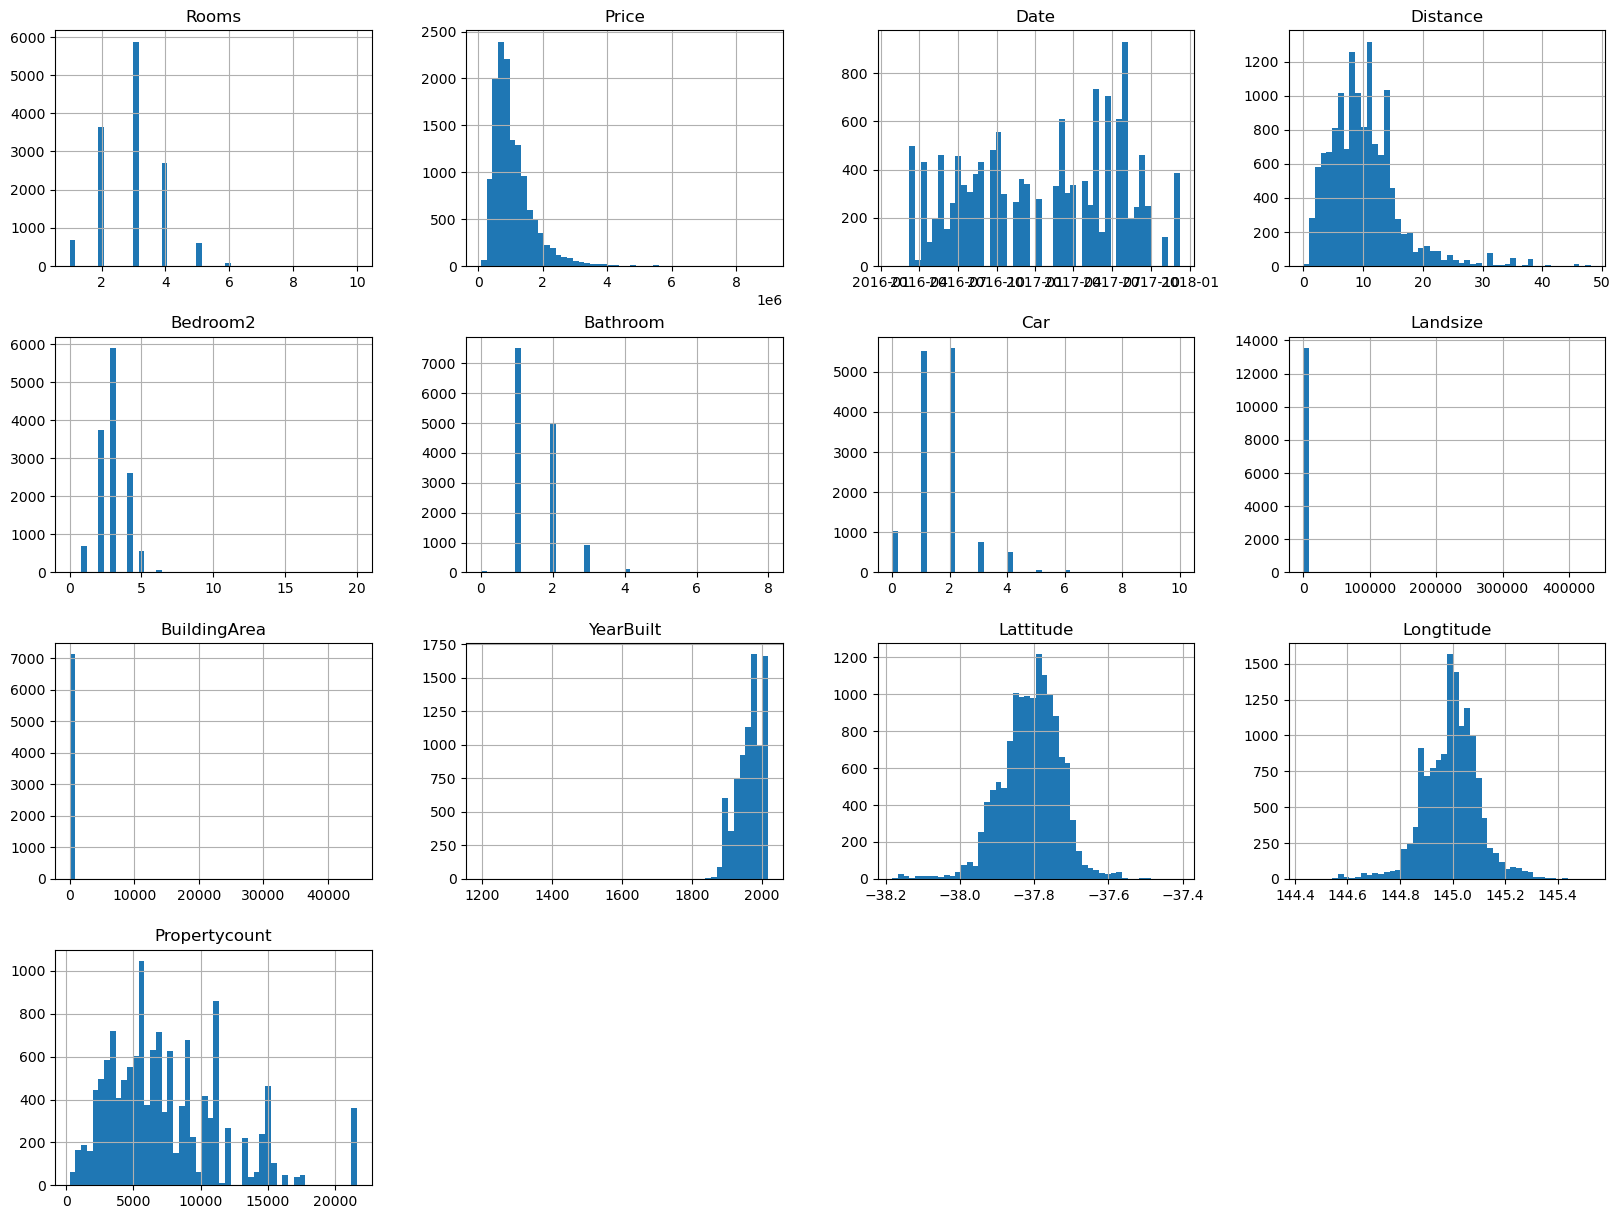

In [22]:
base.hist(bins=50, figsize=(20,15))

Algumas coisas a serem observadas nos histogramas:

- a área de construção é zero para muitas casas (cerca de 50%)
- a maioria das casas parece estar dentro de um raio de 20 quilômetros do centro da cidade
- o tamanho do terreno é zero para quase todas as casas
- o preço da casa está um pouco distorcido

## Geographical data

Vamos usar um gráfico de dispersão para plotar a latitude e a longitude nos dados.

Devido a alguns outliers, não há muita variação na cor das casas no mapa. Por esse motivo, omitimos o 1% superior dos dados para construir o gráfico. Isso dá mais informações sobre onde as casas mais caras estão localizadas.

<AxesSubplot:xlabel='Longtitude', ylabel='Lattitude'>

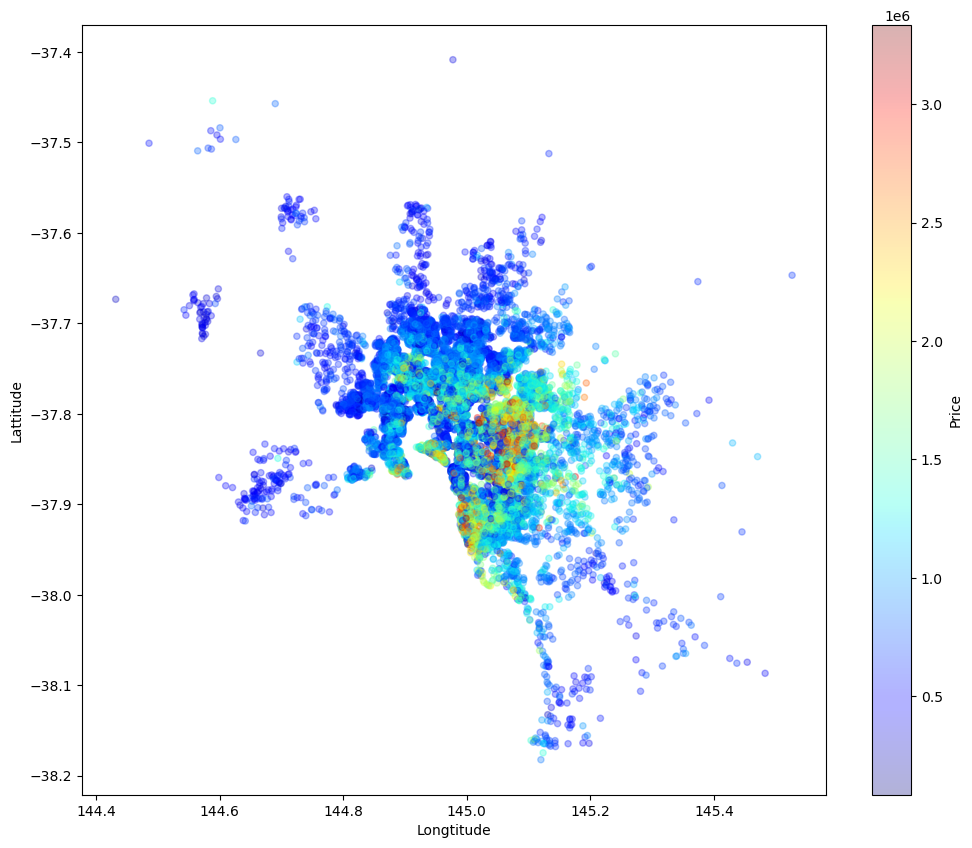

In [23]:
bottom_99p = base.Price < np.percentile(base.Price, 99)
base[bottom_99p].plot(kind='scatter', x='Longtitude', y='Lattitude', 
                      alpha=0.3, figsize=(12,10)
                    ,c='Price', cmap=plt.get_cmap('jet'), colorbar=True)

## Correlações

Com o coeficiente de correlação padrão podemos analisar se existe uma relação linear entre o Preço e as demais variáveis.

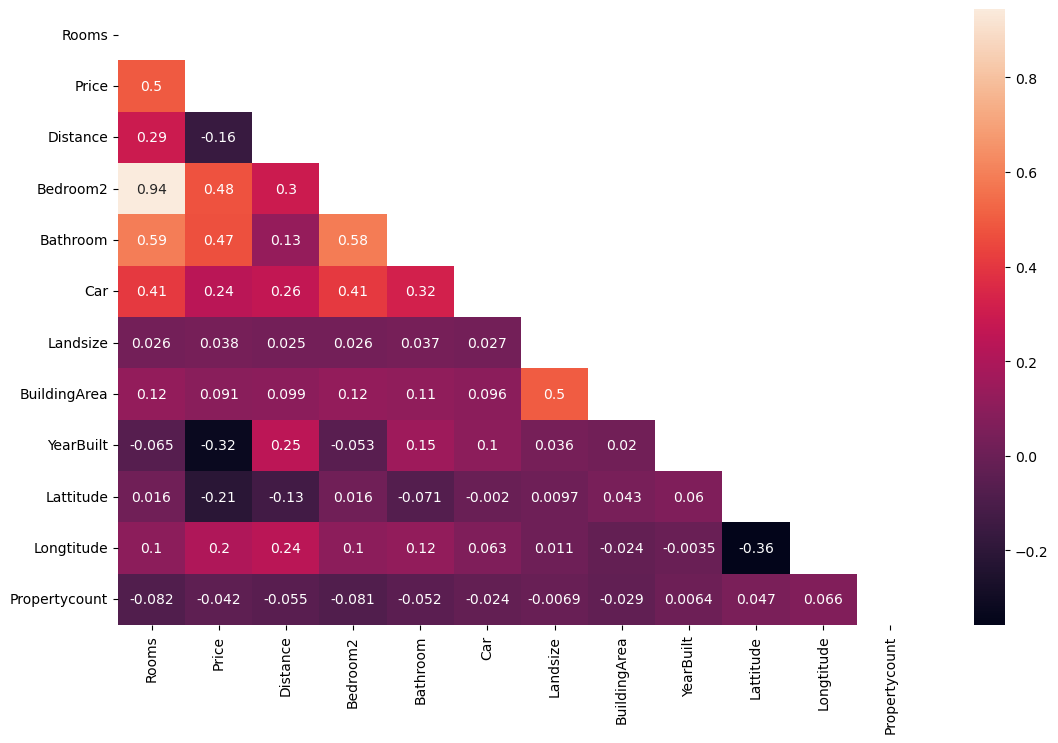

In [24]:
plt.figure(figsize=(13, 8))
corr= base.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, mask=matrix)
plt.show()

Como podemos ver, existe uma relação linear justa entre o Preço e o número de Quartos. Quarto2 e Banheiro também estão correlacionados com Preço, mas provavelmente também estão correlacionados com Quartos. O número de parques de estacionamento também tem um impacto positivo no Preço. Como vimos no gráfico de dispersão das coordenadas geográficas, as casas no leste de Melbourne (ou seja, longitude mais alta) são mais caras.

Casas mais próximas do Central Business District (ou seja, distância menor) são mais caras. Em segundo lugar, quanto mais antiga a casa (ou seja, menor ano de construção), maior o preço.

Vemos que existe uma correlação quase perfeita de Rooms com Bedroom2. Como elas medem a mesma informacao podemos trabalhar com apenas uma delas.

# Selecionando a Base

In [25]:
base.shape[0]

13580

In [26]:
missing_perc = (base.isnull().sum() / base.shape[0]) * 100
missing_perc

Rooms             0.000000
Price             0.000000
Method            0.000000
Date              0.000000
Distance          0.000000
Bedroom2          0.000000
Bathroom          0.000000
Car               0.456554
Landsize          0.000000
BuildingArea     47.496318
YearBuilt        39.580265
Lattitude         0.000000
Longtitude        0.000000
Propertycount     0.000000
dtype: float64

In [27]:
mask = missing_perc < 20
cols = missing_perc[mask].index.tolist()

base_no_missing = base[cols]
print(base_no_missing.shape)
base_no_missing.head()

(13580, 12)


,Rooms,Price,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
0,2,1480000.0,S,2016-03-12,2.5,2.0,1.0,1.0,202.0,-37.7996,144.9984,4019.0
1,2,1035000.0,S,2016-04-02,2.5,2.0,1.0,0.0,156.0,-37.8079,144.9934,4019.0
2,3,1465000.0,SP,2017-04-03,2.5,3.0,2.0,0.0,134.0,-37.8093,144.9944,4019.0
3,3,850000.0,PI,2017-04-03,2.5,3.0,2.0,1.0,94.0,-37.7969,144.9969,4019.0
4,4,1600000.0,VB,2016-04-06,2.5,3.0,1.0,2.0,120.0,-37.8072,144.9941,4019.0


In [28]:
mode_car = base_no_missing["Car"].mode()[0]

base_no_missing["Car"].fillna(mode_car, inplace=True)
base_no_missing.head()

,Rooms,Price,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
0,2,1480000.0,S,2016-03-12,2.5,2.0,1.0,1.0,202.0,-37.7996,144.9984,4019.0
1,2,1035000.0,S,2016-04-02,2.5,2.0,1.0,0.0,156.0,-37.8079,144.9934,4019.0
2,3,1465000.0,SP,2017-04-03,2.5,3.0,2.0,0.0,134.0,-37.8093,144.9944,4019.0
3,3,850000.0,PI,2017-04-03,2.5,3.0,2.0,1.0,94.0,-37.7969,144.9969,4019.0
4,4,1600000.0,VB,2016-04-06,2.5,3.0,1.0,2.0,120.0,-37.8072,144.9941,4019.0


In [29]:
base_no_missing_new = base_no_missing[['Rooms', 'Price', 'Distance', 'Bathroom',
                                        'Car', 'Landsize', 'Lattitude', 'Longtitude', 
                                        'Propertycount']]
print(base_no_missing_new.shape)
base_no_missing_new.head()

(13580, 9)


,Rooms,Price,Distance,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
0,2,1480000.0,2.5,1.0,1.0,202.0,-37.7996,144.9984,4019.0
1,2,1035000.0,2.5,1.0,0.0,156.0,-37.8079,144.9934,4019.0
2,3,1465000.0,2.5,2.0,0.0,134.0,-37.8093,144.9944,4019.0
3,3,850000.0,2.5,2.0,1.0,94.0,-37.7969,144.9969,4019.0
4,4,1600000.0,2.5,1.0,2.0,120.0,-37.8072,144.9941,4019.0


In [30]:
base_no_missing_new.to_csv("./data/base_tratada.csv", sep=";")